 ## Importing Libraries 

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

## 1. Defining Problem Statement and Analysing basic metrics -







### About Aerofit - 


Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.



### Business Problem - 


The market research team at Aerofit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.



### Objective  - 


1.Perform descriptive analytics to create a customer profile for each Aerofit treadmill product by developing appropriate tables and charts.

2.For each Aerofit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.



































#### Basic Observations - 

















In [2]:
data = pd.read_csv("aerofit_treadmill.csv")
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


1. Product, Gender and Martial Status columns are object (string)
2. Age, Education, Usage, Fitness, Income and Miles are the column in int64(integer) form.

In [4]:
data.shape

(180, 9)

Dataset contains 180 rows and 9 columns.

In [5]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


#### Descriptive Analysis - 

1. Total count of all columns is 180.
2. Mean age of the customer is 28 years and 50% of customers mean age is 26.
3. Mean education is 15 with maximum is 21 and minimum is 12.
4. Mean usage per week is 3.3 with maximum is 7 and minimun is 2.
5. Fitness average rating is 3.3 on the scale of 1 to 5
6. Most customer earns around 58K annually, with maximum of 104K and minimum almost 30K (in $).
7. Average miles the customer walk is 103 with maximum is 360 and minimum is 21.


### Conversion of categorical attributes to 'category' -

In [6]:
# Converting Int data type of fintess rating to object data type - 

data_cat = data
data_cat["Fitness_category"] = data.Fitness
data_cat.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,4
1,KP281,19,Male,15,Single,2,3,31836,75,3
2,KP281,19,Female,14,Partnered,4,3,30699,66,3
3,KP281,19,Male,12,Single,3,3,32973,85,3
4,KP281,20,Male,13,Partnered,4,2,35247,47,2


In [7]:
data_cat["Fitness_category"].replace({ 1 : "Poor Shape",
                                       2 : "Bad Shape",
                                       3 : "Average Shape",
                                       4 : "Good Shape",
                                       5 : "Excellent Shape"}, inplace = True)

data_cat.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape


#### Categorization of Fitness Rating - 


1 - Poor Shape

2 - Bad Shape  

3 - Average Shape 

4 - Good Shape  

5 - Excellent Shape


### Statistical Summary - 

In [8]:
# Percentage of unique products - 

prod = data["Product"].value_counts(normalize = True)
percent = prod.map(lambda calc : round(100*calc, 2))
percent 


KP281    44.44
KP481    33.33
KP781    22.22
Name: Product, dtype: float64

1. 44.44% of customers purchased KP281 product.
2. 33.33% of customers purchased KP481 product.
3. 22.22% of customers purchased KP781 product.

In [9]:
# Gender Statistics (%) - 

gender = data["Gender"].value_counts(normalize = True)
gender_per = gender.map(lambda calc : round(100 * calc, 2))
gender_per


Male      57.78
Female    42.22
Name: Gender, dtype: float64

1. Male customers - 57.78% 
2. Female customers - 42.22%


In [10]:
# Marital Status (%) -

marital = data["MaritalStatus"].value_counts(normalize = True)
marital_per = marital.map(lambda calc : round (100 * calc, 2))
marital_per 


Partnered    59.44
Single       40.56
Name: MaritalStatus, dtype: float64

1. Married/Partnered customers - 59.44%
2. Single customers - 40.56%


In [11]:
# Usage - Number of days per week (%) - 

usage = data["Usage"].value_counts(normalize = True)
usage_per = usage.map(lambda calc : round(100 * calc, 2)).reset_index()
usage_per.rename(columns = {"index" :"DaysPerWeek"}, inplace = True)
usage_per


,DaysPerWeek,Usage
0,3,38.33
1,4,28.89
2,2,18.33
3,5,9.44
4,6,3.89
5,7,1.11


1. Around 38% customers use 3 days per week.
2. Less than 2% customers use 7 days per week.


In [12]:
# Fitness rating (%) - 

rating = data["Fitness"].value_counts(normalize = True)
rating_per = rating.map(lambda calc : round( 100 * calc, 2)).reset_index()
rating_per.rename(columns = {"index" : "Rating"}, inplace = True)
rating_per


,Rating,Fitness
0,3,53.89
1,5,17.22
2,2,14.44
3,4,13.33
4,1,1.11


1. More than 53% customers rated as average in fitness.
2. 14% customers rated less than average fitness.
3. 17% customers rated excllent fintness rating.















## 2. Non-Graphical Analysis: Value counts and unique attribute-

In [13]:
# Number of unique product ids-

data["Product"].nunique()


3

In [14]:
# List of unique products-

data["Product"].unique().tolist()


['KP281', 'KP481', 'KP781']

In [15]:
# Total number of unique ages - 

unique_age = data["Age"].nunique()
unique_age 


32

In [16]:
# List of unique ages - 

data["Age"].unique()


array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [17]:
# Gender counts - 

data["Gender"].value_counts()


Male      104
Female     76
Name: Gender, dtype: int64

In [18]:
# Unique Educations - 

data["Education"].unique().tolist()


[14, 15, 12, 13, 16, 18, 20, 21]

In [19]:
# Count of customers on the rating scale 1 to 5 -

data["Fitness"].value_counts().sort_index()


1     2
2    26
3    97
4    24
5    31
Name: Fitness, dtype: int64

In [20]:
# Count of customers with 3 diff products - 

data["Product"].value_counts().sort_index()


KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [21]:
# Customer counts on usage - 

data["Usage"].value_counts().sort_index()


2    33
3    69
4    52
5    17
6     7
7     2
Name: Usage, dtype: int64

In [22]:
# Count of single and partnered customers - 

data["MaritalStatus"].value_counts()


Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

#### Conclusion - 

1. There are 3 different type of products are present - KP281, KP481, KP781.
2. Most purchased treadmill product is KP281.
3. In the dataset Male customers - 104 and Female customers - 76.
4. Highest rated Fitness rating is 3.
5. Most customers usage treadmill at least 3 days per week.
6. Majority of the customers who have purchased treadmill are Married/Partnered.


## 3. Visual Analysis - Univariate & Bivariate - 

### Univariate Analysis -
#### For continuous variable(s): Distplot, countplot, histogram -

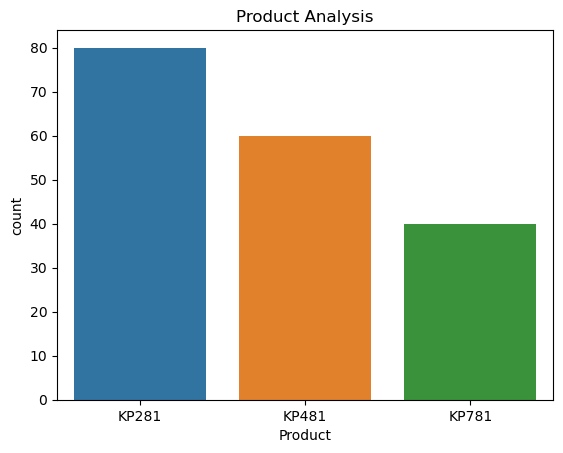

In [23]:
# Product Analysis - 

sns.countplot(data = data, x = "Product")
plt.title("Product Analysis")
plt.show()


1. KP281 is the most purchased product.
2. KP781 is the least purchased product.


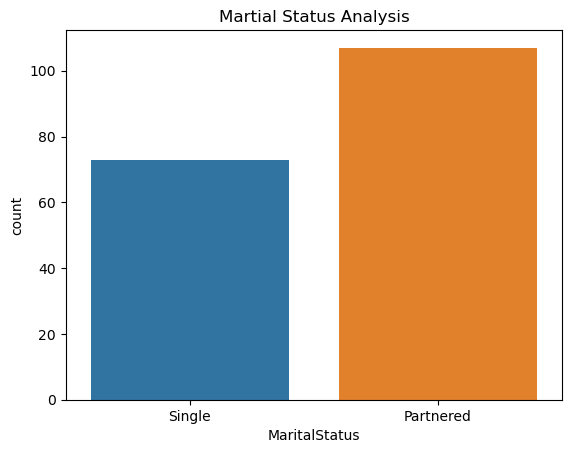

In [24]:
# Marital Status Analysis - 

sns.countplot(data = data, x = "MaritalStatus")
plt.title("Martial Status Analysis")
plt.show()

Most products purchased by Married/Partnered customers.

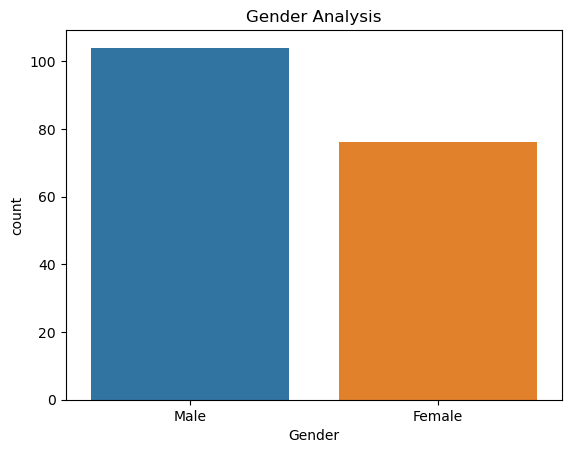

In [25]:
# Gender Analysis - 

sns.countplot(data = data , x = "Gender")
plt.title("Gender Analysis")
plt.show()


Product purchased by Males is maximum as compaire to Females.

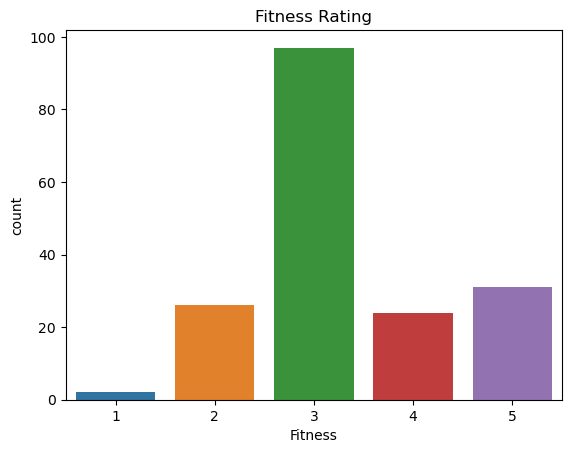

In [26]:
# Fitness Rating Analysis - 

sns.countplot(data = data, x = "Fitness")
plt.title("Fitness Rating")
plt.show()


1. Excellent shape is the second highest rating.
2. More than 90 customers rated as Average fitness rating.

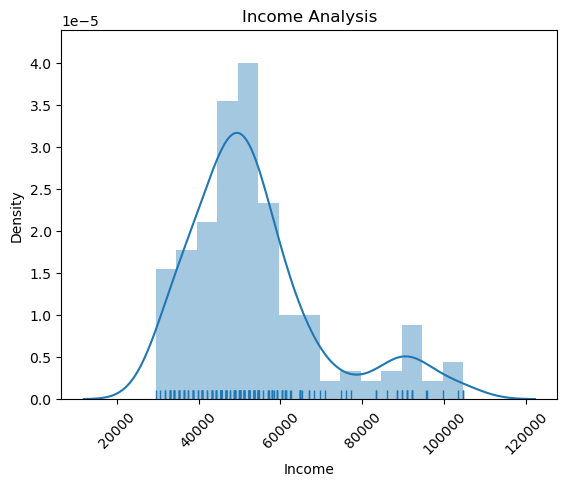

In [27]:
# Income Analysis - 

sns.distplot( data.Income, rug = True)
plt.xticks(rotation = 45)
plt.title("Income Analysis")
plt.show()


Most of the customers who have purchased product have a average income between 40k to 60k.

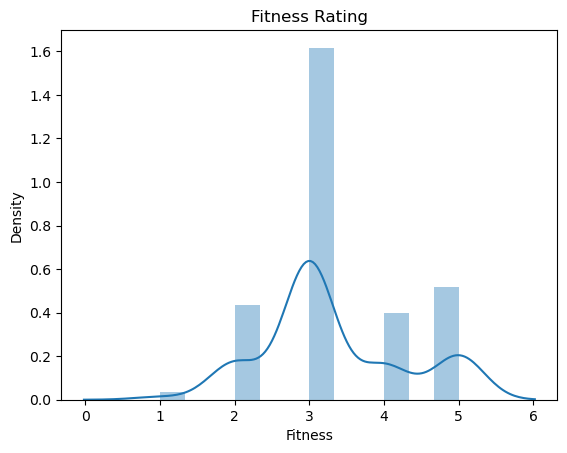

In [28]:
# Fintess Rating Analysis - 

sns.distplot(data.Fitness)
plt.title("Fitness Rating")
plt.show()


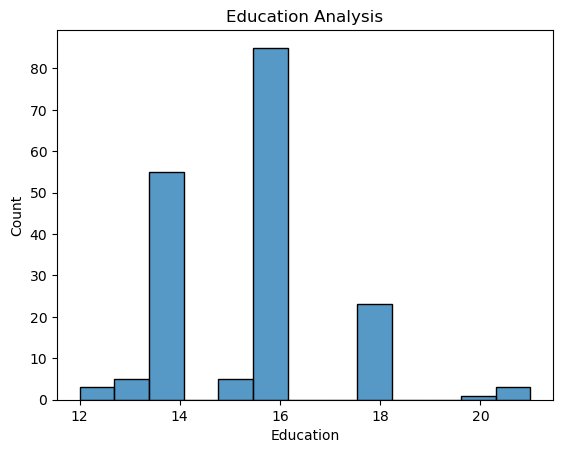

In [29]:
# Education Analysis - 

sns.histplot( data = data , x = "Education")
plt.title("Education Analysis")
plt.show()


1. Highest education number of customers  is 16
2. 14 is the second highest education of the customers.
3. 20 is the least education of the customers.


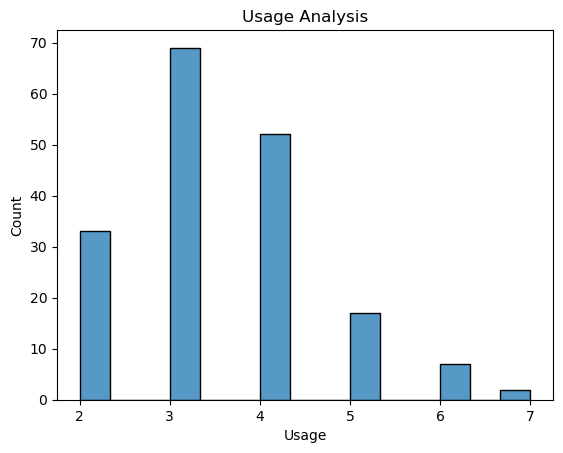

In [30]:
# Usage Analysis - 

sns.histplot(data = data, x = "Usage")
plt.title("Usage Analysis")
plt.show()


1. 3 days per week is the most commom usage of the customers.
2. Very few customers use product 7 days per week.


#### For Categorical Variables : Boxplot  -

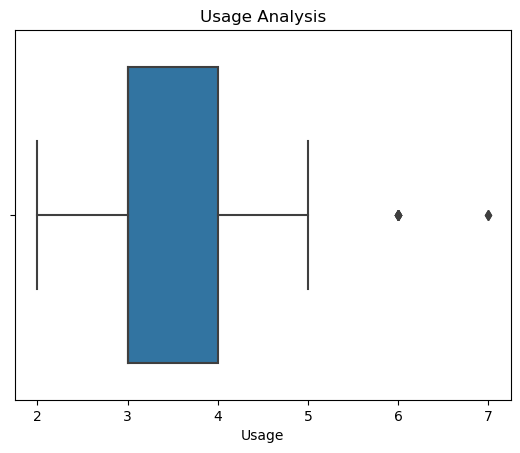

In [31]:
# Usage Analysis - 

sns.boxplot( data = data, x = "Usage")
plt.title("Usage Analysis")
plt.show()



1. 3 to 4 days is the most preferred days.
2. 6 and 7 days per week is rare usage days for few customers (outliers).

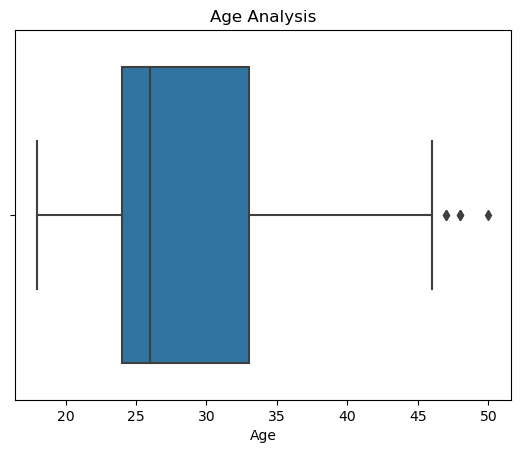

In [32]:
# Age Analysis - 

sns.boxplot( data = data, x = "Age")
plt.title("Age Analysis")
plt.show()


1. 23 to 34 is the most common customer age group that has purchased the product.
2. Above 45 years old customers are very rare.

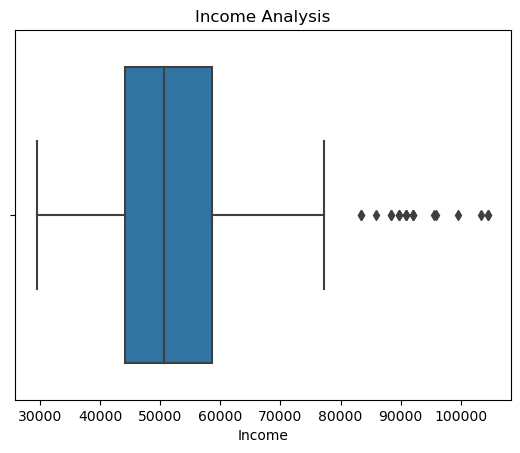

In [33]:
# Income Analysis - 

sns.boxplot( data = data, x = "Income")
plt.title("Income Analysis")
plt.show()


#### For Correlation: Heatmaps, Pairplots - 

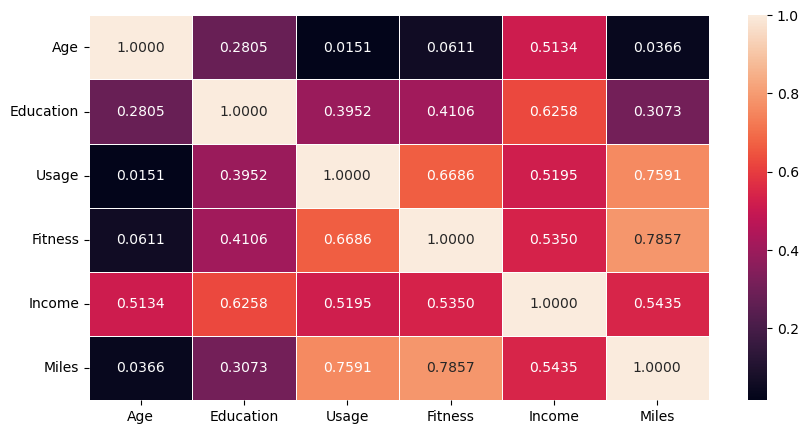

In [34]:
# Correlation Heatmap - 

plt.figure(figsize =(10,5))
co = sns.heatmap(data.corr(), annot = True, fmt = ".4f", linewidth = .5)
plt.yticks (rotation = 0)
plt.show()



1. Correlation between Age and Miles is 0.03.
2. Correlation between Education and Income is 0.62.
3. Correlation between Usage and Fitness is 0.66.
4. Correlation between Income and Usage is 0.51.


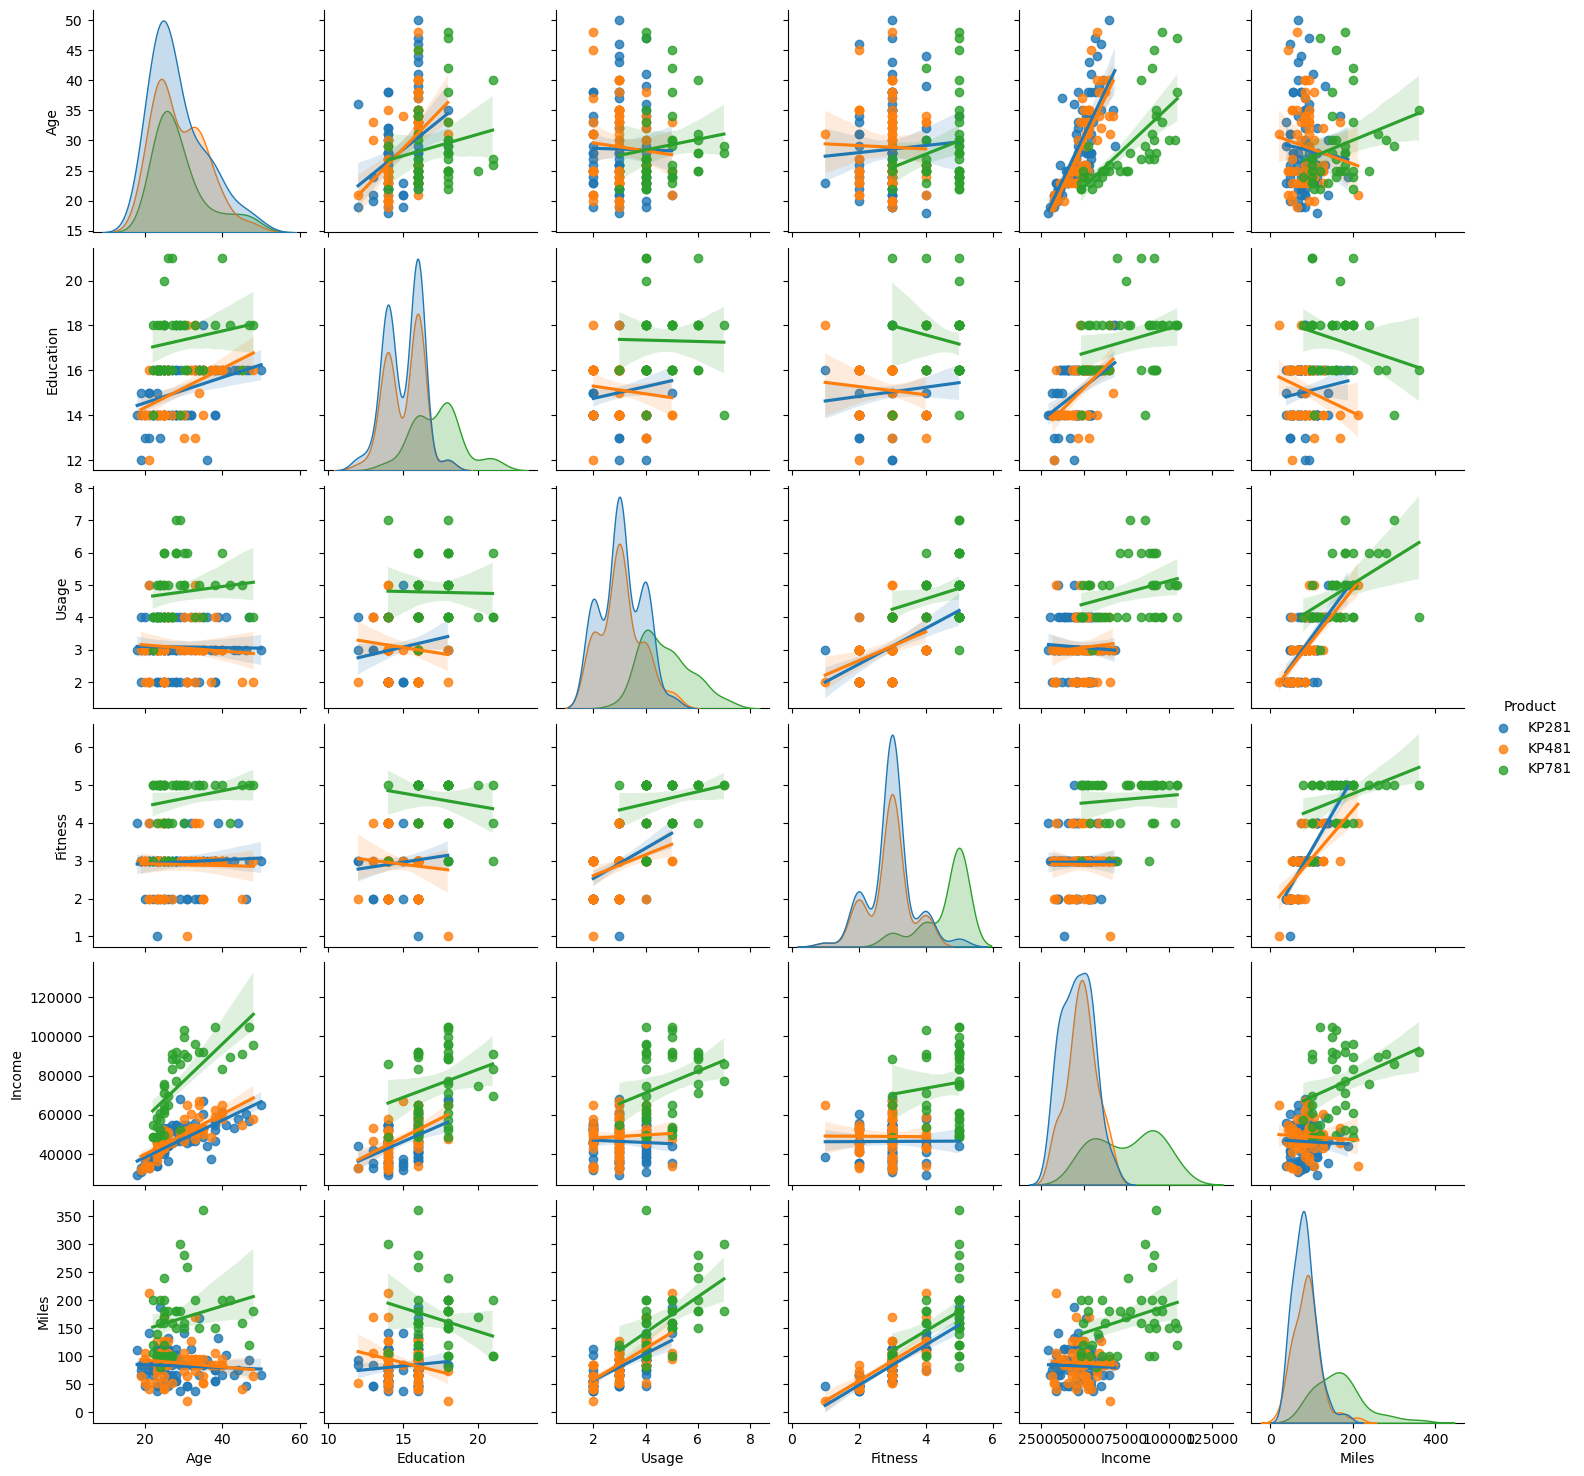

In [35]:
# Product Analysis - Pair Plot - 

sns.pairplot(data, hue = "Product", kind = "reg")
plt.show()


### Bivariate Analysis -

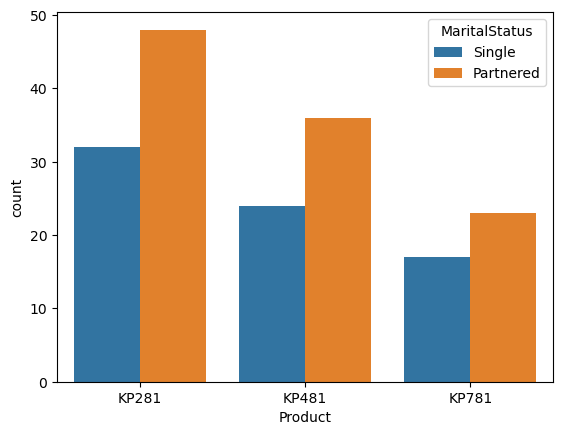

In [36]:
# Product Purchased among Married/Partnered and Single 

sns.countplot(data = data, x = "Product", hue = "MaritalStatus")
plt.show()


1. Between Singles and Partnered, Partnered customers are the major product purchasers.
2. KP281 is the most preferred product by customers.


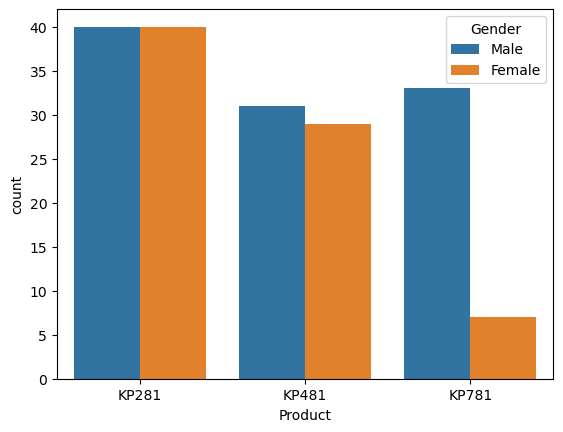

In [37]:
# Product purchased among Male and Female - 

sns.countplot( data = data, x = "Product", hue = "Gender")
plt.show()


1. KP781 product is mostly preferred by Male customers.
2. KP281 product is equally preferred by both Male and Female customers.
3. Overall Male customers are the highest product purchasers.


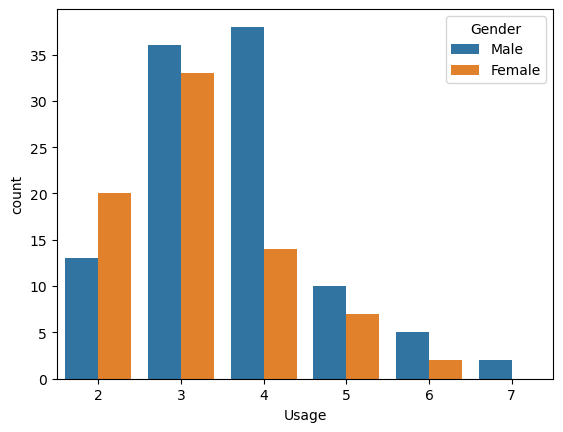

In [38]:
# Product usage among Male and Female - 

sns.countplot(data = data, x = "Usage", hue = "Gender")
plt.show()


1. Male's usage is highest 4 days per week.
2. Female's usage mostly 3 days per week.
3. Only few Male customers use 7 days per week where as Female customers maximum usage is only 6 days per week.


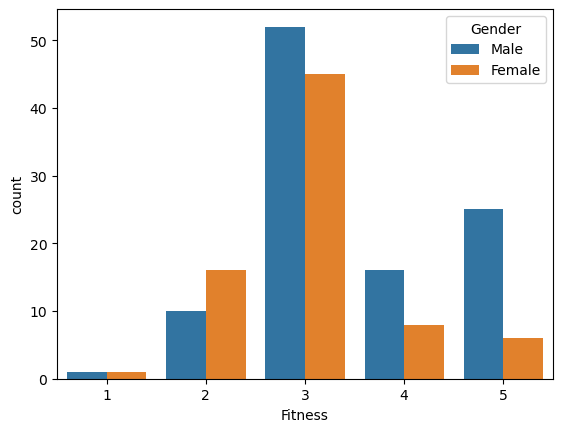

In [39]:
# Fitness rating categorised by Gender -
 
sns.countplot( data = data, x = "Fitness", hue = "Gender")
plt.show()


Both Male and Female mostly rated as Average. Significant number of Male customers are at Excellent shape.

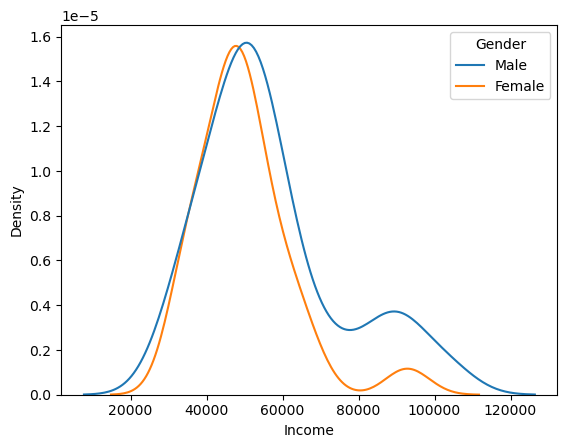

In [40]:
# Product purchased customers Income and their Gender - 

sns.kdeplot( data = data , x ="Income", hue = "Gender")
plt.show()


40k to 60k is the most common income of the customers.

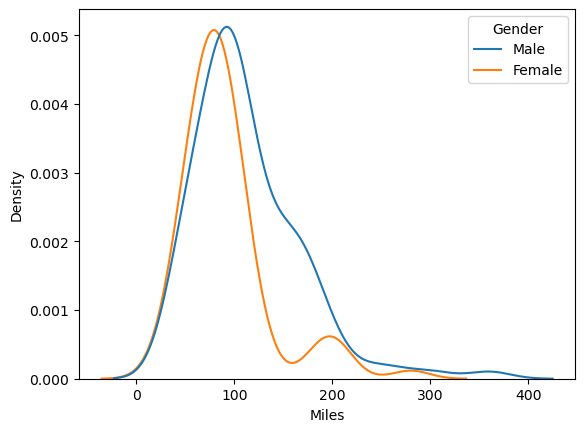

In [41]:
# Distance covered by Gender - 

sns.kdeplot( data = data, x = "Miles", hue = "Gender")
plt.show()


Male are consistent distance coverage than Female customers. Female has covered max 300 miles distance.

## Scatterplot for Gender and Age who rated less than 2 in Fitness rating - 

sns.jointplot( x = "Age", y = "Gender", data= data[data.Fitness < 3])
plt.show()


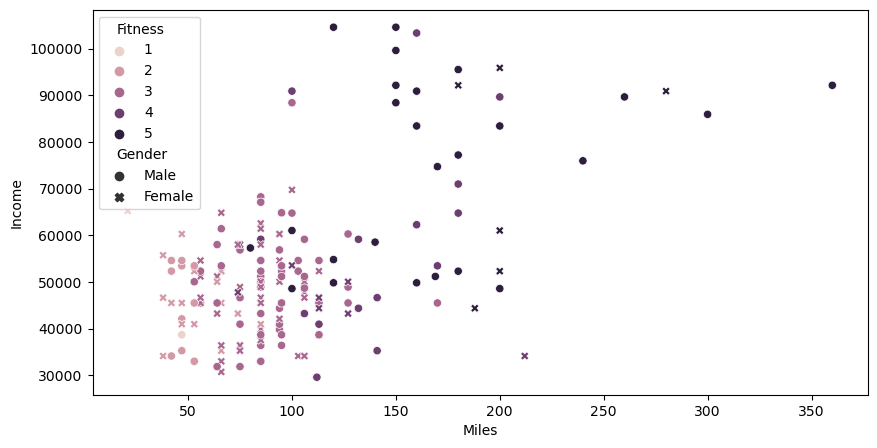

In [43]:
# Scatter Plot - 

plt.figure(figsize = (10,5))
sns.scatterplot(x = "Miles", y = "Income", data = data, hue = "Fitness", style = "Gender")
plt.show()


Most of the customers fitness level is around 3 to 4.But there are very few customers who earn a lot and run more miles.

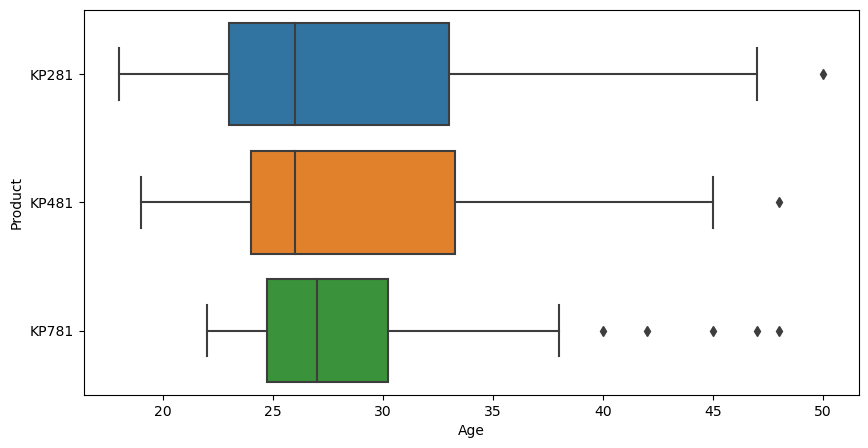

In [44]:
plt.figure(figsize = (10,5))
sns.boxplot(x = "Age", y = "Product", data = data)
plt.show()


1. Most customers are comfortabel with KP281 product.
2. KP481 is the second highest product among younger side of the customer.
3. Roughly few customers with age above 40 use KP781.


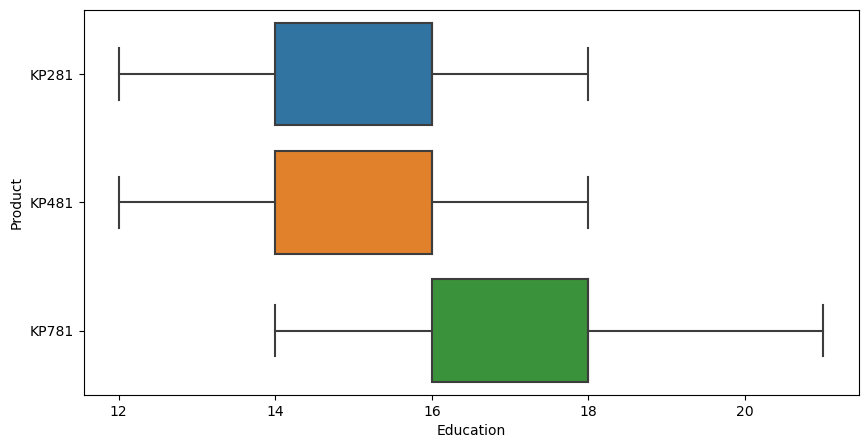

In [45]:
# Product purchased according to Education - 

plt.figure(figsize = (10,5))
sns.boxplot( x = "Education", y = "Product", data = data)
plt.show()


1. KP781 product preferred by Higher education of 16 to 18. 
2. Customer having education between 14 to 16 perfer KP281 and KP481 equally.

## 4. Missing Value & Outlier Detection - 

In [46]:
# Null value - 

data.isna().sum()

Product             0
Age                 0
Gender              0
Education           0
MaritalStatus       0
Usage               0
Fitness             0
Income              0
Miles               0
Fitness_category    0
dtype: int64

There is no Null value in given data 

In [47]:
# Duplicate values - 

data.duplicated().sum()

0

No duplicate value obeserved in the given data.

In [54]:
# Outlier calculation for Miles using Inter Quratile Range - 

q_75, q_25 = np.percentile(data["Miles"], [75, 25])
miles_qrt = q_75 - q_25
miles_qrt


48.75

Inter Quartile Range for Miles is 48.75.

## 5. Business Insights based on Non-Graphical and Visual Analysis - 

#### Probability for each product for the both genders - 

In [61]:
def gender_probability(gender,data):
    print(f"Prob P(KP781) for {gender}: {round(data['KP781'][gender]/data.loc[gender].sum(),3)}")
    print(f"Prob P(KP481) for {gender}: {round(data['KP481'][gender]/data.loc[gender].sum(),3)}")
    print(f"Prob P(KP281) for {gender}: {round(data['KP281'][gender]/data.loc[gender].sum(),3)}")
    
data_temp = pd.crosstab(index=data['Gender'],columns=[data['Product']])
print("Prob of Male: ",round(data_temp.loc['Male'].sum()/len(data),3))
print("Prob of Female: ",round(data_temp.loc['Female'].sum()/len(data),3))
print()
gender_probability('Male',data_temp)
print()
gender_probability('Female',data_temp)


Prob of Male:  0.578
Prob of Female:  0.422

Prob P(KP781) for Male: 0.317
Prob P(KP481) for Male: 0.298
Prob P(KP281) for Male: 0.385

Prob P(KP781) for Female: 0.092
Prob P(KP481) for Female: 0.382
Prob P(KP281) for Female: 0.526


#### Probability of each product for given Marital Status - 

In [62]:
def MS_Probability(ms_status,data):
    print(f"Prob P(KP781) for {ms_status}: {round(data['KP781'][ms_status]/data.loc[ms_status].sum(),3)}")
    print(f"Prob P(KP481) for {ms_status}: {round(data['KP481'][ms_status]/data.loc[ms_status].sum(),3)}")
    print(f"Prob P(KP281) for {ms_status}: {round(data['KP281'][ms_status]/data.loc[ms_status].sum(),3)}")
    
df_temp = pd.crosstab(index=data['MaritalStatus'],columns=[data['Product']])
print("Prob of P(Single): ",round(df_temp.loc['Single'].sum()/len(data),3))
print("Prob of P(Married/Partnered): ",round(df_temp.loc['Partnered'].sum()/len(data),3))
print()
MS_Probability('Single',df_temp)
print()
MS_Probability('Partnered',df_temp)

Prob of P(Single):  0.406
Prob of P(Married/Partnered):  0.594

Prob P(KP781) for Single: 0.233
Prob P(KP481) for Single: 0.329
Prob P(KP281) for Single: 0.438

Prob P(KP781) for Partnered: 0.215
Prob P(KP481) for Partnered: 0.336
Prob P(KP281) for Partnered: 0.449


1. Probability of Male customer of purchasing product is - 57.77%
2. Probability of Female customer of purchasing product is - 42.22%



#### Conditional Probabilities - 

In [63]:
np.round((pd.crosstab([data.Product], data.Gender, margins = True, normalize = "columns")) * 100, 2)

Gender,Female,Male,All
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


#### Probability of selling - 

1. KP281 for Female customer - 52%  and for Male customer - 38%
2. KP481 for Female customer - 38%  and for Male customer - 30%
3. KP781 for Female customer - 9%   and for Male customer - 32% 

KP281 is more recommended for Female customers and for KP781 is more recommended for Male customers.


## 6. Recommendations - 

1. KP781 provides more features and functionalities that's why it should be marketed for professionals and atheletes.
2. KP781 product should be promoted using influencers and other international athelets.
3. Female who prefer fitness product are very low , hence we should run a marketing campaign to encourage women to more heatly and fitenss.
4. Provide customer support and recommendation to users to upgrade the product for next level versions.
5. KP781 can be recommended for Female customers who excercises extensively along with easy usage guidance since this type is adavanced.
6. Target the age group above 40 years to recomend product KP781.
7. KP281 is easily affordable entry level product, and it is maximum selling product.
8. KP481 is and Intermediate level product, and it is second most popular product.
9. KP781 is high price & the advanced type due to this customer prefer it less. Customers use this product for covering more distance.
10. KP281 & KP481 products are preferred by customers whose annul income lies between the range 39k - 53k dollars. That's why these models should promoted as budget treadmill. 